In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and view the first few rows
data= pd.read_csv("star_classification.csv")
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
# print the shape of the dataset
data.shape

(100000, 18)

In [4]:
# Check the data types for each column and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
# Look at basic statistics for the data
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
# Check the distribution of each class
data["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [8]:
# Encode classes using Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])

<Axes: >

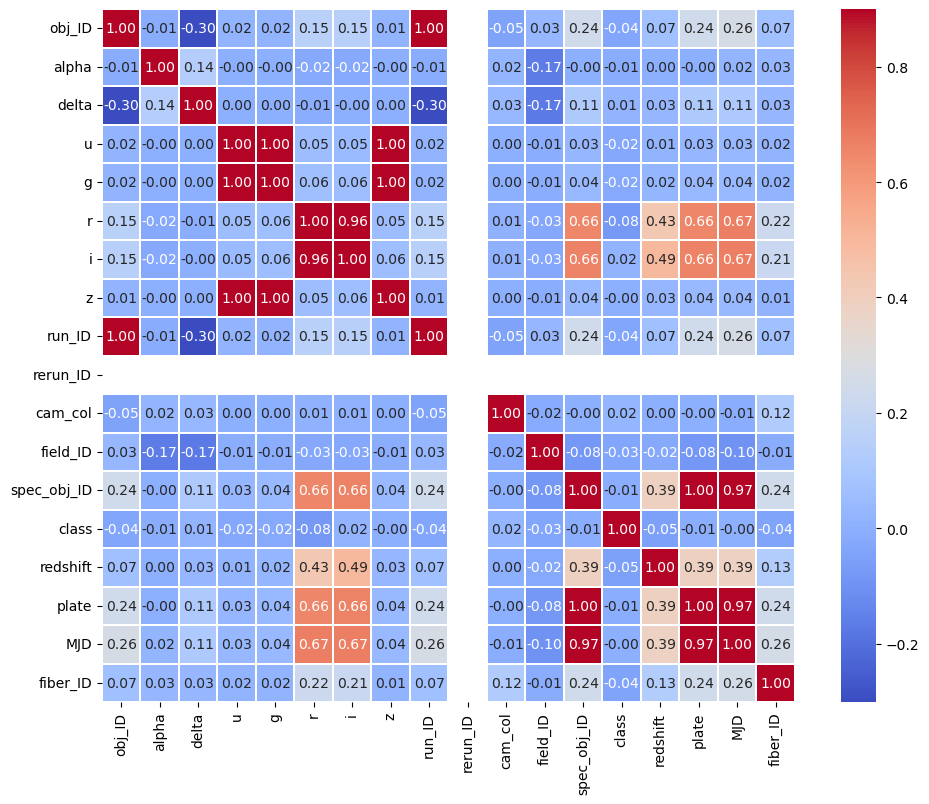

In [9]:
# look at the correlation of columns with .corr()
correlation_matrix = data.corr()

# plot the correlations with sns.heatmap
plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.9, square=True, cmap='coolwarm', annot=True, linewidths=0.01, fmt= '.2f')

In [10]:
# Pair plot to generate an overview
# x_vars = [col for col in data.columns if col != 'class']
# sns.pairplot(data,  y_vars=['class'], x_vars=x_vars, hue='class')


In [11]:
# TO-DO: More Data Visualization

In [12]:
# Remove any uniformative features and save the new dataset into data
data = data.drop(['run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','obj_ID'], axis = 1)

In [13]:
# Split data into features (X) and target (y)
X = data.drop(['class'], axis=1)
y = data['class']

X.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,56187


In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets. Use 20% for test and random_state=0
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


### Model 1: Logistic Regresstion

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
# Split the training data into training and validation sets
# Using 80% of the data for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0, stratify = y_train_full)

# Define the hyperparameters to test
C_values = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

# Initialize variables to store the best parameters and the highest accuracy score
best_params = None
best_score = 0

# Initialize scalar
scaler = StandardScaler()

# Learn scaler on training set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
    
# Transform validation set with learned scaler
X_val_scaled = scaler.transform(X_val)

# Loop through each value of the hyperparameter C
for C in C_values:
    logreg = LogisticRegression(max_iter=1500, C=C)
    
    # Fit the model to the scaled training data
    logreg.fit(X_train_scaled, y_train)
    
    # Evaluate the model on the validation set
    # Predict labels for the validation set and calculate accuracy
    y_pred = logreg.predict(X_val_scaled)
    score = accuracy_score(y_val, y_pred)
    
    # Check if the current score is the best one so far
    if score > best_score:
        best_score = score  # Update the best score
        best_params = {'C': C}  # Update the best parameter

# Output the best hyperparameter and the corresponding validation score
print("Best Parameter (C):", best_params)
print("Best Validation Score:", best_score)

Best Parameter (C): {'C': 100000}
Best Validation Score: 0.9650625


### Model 2: SVC

In [25]:
from sklearn.svm import SVC

# Define the hyperparameters to test
C_values = [0.1, 1.0, 10.0]
gamma_values = [0.01, 0.1, 1]

# Initialize variables to store the best parameters and the highest accuracy score
best_params = None
best_score = 0

# Loop through each combination of hyperparameters C and gamma
for C in C_values:
    for gamma in gamma_values:
        svc = SVC(C=C, gamma=gamma)
    
        # Fit the model to the scaled training data
        svc.fit(X_train_scaled, y_train)
        
        # Evaluate the model on the validation set
        # Predict labels for the validation set and calculate accuracy
        y_pred = svc.predict(X_val_scaled)
        score = accuracy_score(y_val, y_pred)
        
        # Check if the current score is the best one so far
        if score > best_score:
            best_score = score 
            best_params = {'C': C, 'gamma': gamma}  

# Output the best hyperparameters and the corresponding validation score
print("Best Parameters (C, gamma):", best_params)
print("Best Validation Score:", best_score)

Best Parameters (C, gamma): {'C': 10.0, 'gamma': 0.1}
Best Validation Score: 0.9701875


### Model 3: Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to test
n_estimators_values = [10, 50, 100, 200]  
max_depth_values = [10, 15, 20, 30]  

# Initialize variables to store the best parameters and the highest accuracy score
best_params = None
best_score = 0

# Loop through each combination of hyperparameters n_estimators and max_depth
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
    
        # Fit the model to the scaled training data
        forest.fit(X_train, y_train)
        
        # Evaluate the model on the validation set
        # Predict labels for the validation set and calculate accuracy
        y_pred = forest.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        # Check if the current score is the best one so far
        if score > best_score:
            best_score = score  
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth} 

# Output the best hyperparameters and the corresponding validation score
print("Best Parameters (n_estimators, max_depth):", best_params)
print("Best Validation Score:", best_score)

Best Parameters (n_estimators, max_depth): {'n_estimators': 100, 'max_depth': 20}
Best Validation Score: 0.9795625


In [29]:
# Find test score using best model
forest = RandomForestClassifier(n_estimators = 100, max_depth = 20)
forest.fit(X_train_full, y_train_full)
print("Testing score: {:.3f}".format(forest.score(X_test, y_test)))

Testing score: 0.978


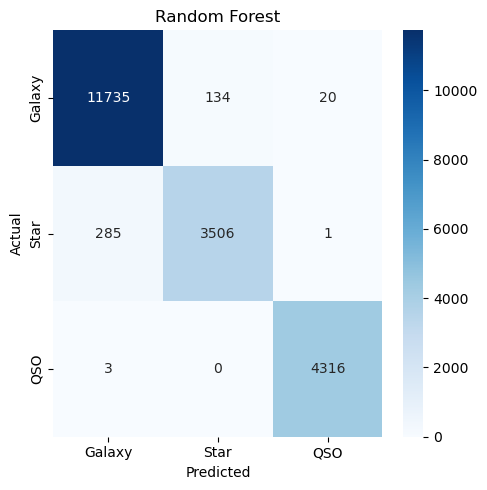

In [34]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
y_pred = forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)

# Define class labels in the correct order
class_labels = ['Galaxy', 'Star', 'QSO']

# Set up the figure size
fig, axes = plt.subplots(figsize=(5, 5))

# Create a heatmap
sns.heatmap(cm_rf, xticklabels=class_labels, yticklabels=class_labels,
            annot=True, fmt='d', cmap='Blues', ax=axes)

# Set titles and labels
axes.set_title('Random Forest')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()